## Multi-Class Classification

take clustered data, classify

In [1]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.0.4'

In [2]:
clustered = pd.read_csv('clustered/clustered_meanshift _2023-09-03 12:30:33.csv')
clustered

,Unnamed: 0,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,sum_change.1,Cluster
0,0,-0.000618,-0.000017,-0.000210,-0.002384,-0.000533,-5.009518e-03,Cluster 0
1,1,-0.002358,-0.000002,-0.000818,-0.000333,0.000135,1.345640e-04,Cluster 0
2,2,0.004750,-0.000036,0.001573,-0.004835,-0.000233,-3.410602e-03,Cluster 0
3,3,-0.000987,0.000002,-0.000398,0.000062,-0.000502,8.855895e-07,Cluster 0
4,4,0.001531,0.000010,0.000334,0.001094,-0.000768,-1.377036e-02,Cluster 0
...,...,...,...,...,...,...,...,...
5573,5630,0.000251,0.003062,0.000103,0.014462,-0.000796,-1.690055e-03,Cluster 0
5574,5631,0.000555,0.000699,0.000168,0.003437,-0.000398,-2.389645e-03,Cluster 0
5575,5633,0.004809,0.000779,0.001181,0.003685,0.000399,-4.980070e-04,Cluster 0
5576,5634,-0.000989,-0.000484,-0.000248,-0.002320,0.000000,-1.694517e-03,Cluster 0


In [3]:
# clustered.drop(['group', 'time', 's_MP', 'change', 'type', 'length', 'sum_change', 'surge_area' ] , axis=1, inplace=True) 
print(clustered.columns)


Index(['Unnamed: 0', 'precursor_buy_cap_pct_change',
       'precursor_ask_cap_pct_change', 'precursor_bid_vol_pct_change',
       'precursor_ask_vol_pct_change', 'change.1', 'sum_change.1', 'Cluster'],
      dtype='object')


In [4]:
#setup 
from pycaret.classification import *
s = setup(clustered, target = 'Cluster', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"Cluster 0: 0, Cluster 1: 1, Cluster 10: 2, Cluster 11: 3, Cluster 12: 4, Cluster 13: 5, Cluster 2: 6, Cluster 22: 7, Cluster 26: 8, Cluster 3: 9, Cluster 33: 10, Cluster 34: 11, Cluster 4: 12, Cluster 45: 13, Cluster 46: 14, Cluster 5: 15, Cluster 51: 16, Cluster 6: 17, Cluster 62: 18, Cluster 66: 19, Cluster 7: 20, Cluster 70: 21, Cluster 77: 22, Cluster 8: 23, Cluster 82: 24, Cluster 9: 25"
4,Original data shape,"(5578, 8)"
5,Transformed data shape,"(5578, 8)"
6,Transformed train set shape,"(3904, 8)"
7,Transformed test set shape,"(1674, 8)"
8,Numeric features,7
9,Preprocess,True


In [5]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [6]:
type(exp)


pycaret.classification.oop.ClassificationExperiment

In [7]:
exp.setup(clustered, target = 'Cluster', session_id = 42)


,Description,Value
0,Session id,42
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"Cluster 0: 0, Cluster 1: 1, Cluster 10: 2, Cluster 11: 3, Cluster 12: 4, Cluster 13: 5, Cluster 2: 6, Cluster 22: 7, Cluster 26: 8, Cluster 3: 9, Cluster 33: 10, Cluster 34: 11, Cluster 4: 12, Cluster 45: 13, Cluster 46: 14, Cluster 5: 15, Cluster 51: 16, Cluster 6: 17, Cluster 62: 18, Cluster 66: 19, Cluster 7: 20, Cluster 70: 21, Cluster 77: 22, Cluster 8: 23, Cluster 82: 24, Cluster 9: 25"
4,Original data shape,"(5578, 8)"
5,Transformed data shape,"(5578, 8)"
6,Transformed train set shape,"(3904, 8)"
7,Transformed test set shape,"(1674, 8)"
8,Numeric features,7
9,Preprocess,True


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9900,0.0000,0.9900,0.9859,0.9875,0.8909,0.8926,0.1560
xgboost,Extreme Gradient Boosting,0.9890,0.0000,0.9890,0.9845,0.9864,0.8778,0.8793,0.5570
rf,Random Forest Classifier,0.9887,0.0000,0.9887,0.9855,0.9865,0.8791,0.8800,0.2230
gbc,Gradient Boosting Classifier,0.9869,0.0000,0.9869,0.9841,0.9847,0.8603,0.8610,4.4810
dt,Decision Tree Classifier,0.9857,0.0000,0.9857,0.9845,0.9844,0.8472,0.8480,0.0350
nb,Naive Bayes,0.9854,0.0000,0.9854,0.9839,0.9840,0.8498,0.8508,0.0330
lda,Linear Discriminant Analysis,0.9793,0.0000,0.9793,0.9857,0.9811,0.7959,0.7991,0.0340
ada,Ada Boost Classifier,0.9547,0.0000,0.9547,0.9264,0.9401,0.3055,0.3449,0.1480
ridge,Ridge Classifier,0.9544,0.0000,0.9544,0.9124,0.9328,0.1300,0.2145,0.0290
lr,Logistic Regression,0.9531,0.0000,0.9531,0.9129,0.9319,0.1008,0.1367,0.7050


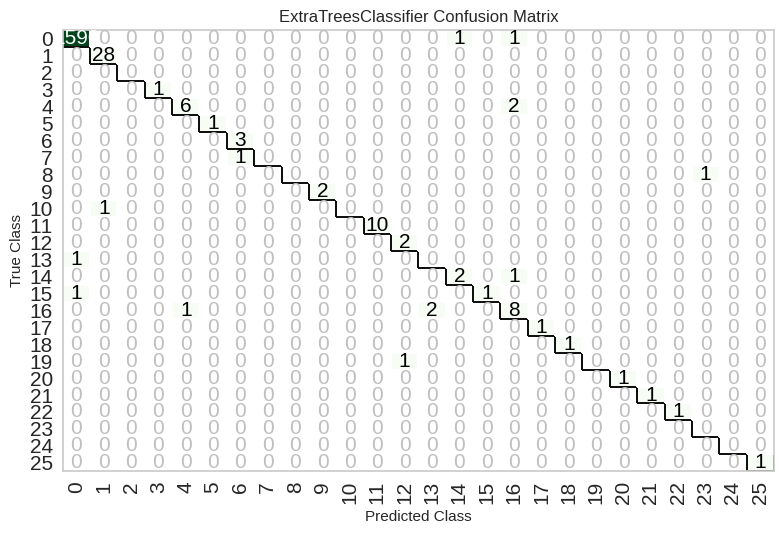

In [9]:
plot_model(best, plot = 'confusion_matrix')

In [11]:
# plot_model(best, plot = 'auc')


In [ ]:
# plot_model(best, plot = 'efficiency')
# # 

In [12]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
holdout_pred = predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9916,0,0.9916,0.9909,0.9911,0.9121,0.9121


In [14]:
holdout_pred.head()


,Unnamed: 0,precursor_buy_cap_pct_change,precursor_ask_cap_pct_change,precursor_bid_vol_pct_change,precursor_ask_vol_pct_change,change.1,sum_change.1,Cluster,prediction_label,prediction_score
909,912,-0.002686,0.000171,-0.001345,0.006584,-0.000356,-0.003091,0,Cluster 0,1.0
1651,1663,-0.004154,0.000020,-0.002237,0.000760,-0.000908,-0.013649,0,Cluster 0,1.0
4580,4623,0.011690,0.001668,0.003952,0.005854,-0.003499,-0.003499,0,Cluster 0,1.0
4892,4938,0.008355,0.000048,0.002528,0.000062,0.000471,0.000314,0,Cluster 0,1.0
3552,3588,-0.007921,0.000068,-0.003851,0.000085,-0.001122,-0.002897,0,Cluster 0,1.0


### loading a model

In [ ]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

In [ ]:
# functional API
# loaded_model = load_model('iforest_pipeline')
# print(loaded_model)

# OOP API
# loaded_model = s.load_model('kmeans_pipeline')
# print(loaded_model)